In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import config

from intraday_handler import (
	intraday_read_csv_correct_time,
	intraday_feature_trend,
	intraday_expected_cum_rvol,
	intraday_rvol
)

from intraday_viz import(
	intraday_feature_trend_viz,
	intraday_rvol_viz,
)


In [2]:
intraday_rolling_window = config.intraday_rolling_window
stock_ticker = config.stock_ticker

In [3]:
## default config 1 month intraday data
df_rth = intraday_read_csv_correct_time(config.INTRADAY_FILEPATH)
intraday_volume_df = intraday_feature_trend(df_rth, "volume",intraday_rolling_window)
intraday_expected_cum_rvol_df = intraday_expected_cum_rvol(df_rth, intraday_rolling_window)
intraday_rvol_df = intraday_rvol(df_rth, intraday_expected_cum_rvol_df, intraday_rolling_window)

In [4]:
df_rth

,close,volume
date,,
2025-08-07 10:00:00,153.5001,2361682.0
2025-08-07 11:00:00,151.9150,1588514.0
2025-08-07 12:00:00,152.1100,1163869.0
2025-08-07 13:00:00,153.1600,576608.0
2025-08-07 14:00:00,152.6700,558516.0
...,...,...
2025-09-05 12:00:00,110.7400,805913.0
2025-09-05 13:00:00,112.2950,806046.0
2025-09-05 14:00:00,114.2000,871444.0


In [5]:
intraday_volume_df

10:00:00    2127669.0
11:00:00    1520142.4
12:00:00     875165.8
13:00:00     787816.0
14:00:00     702290.2
15:00:00    1191416.0
16:00:00     795450.0
Name: Average Volume, dtype: float64

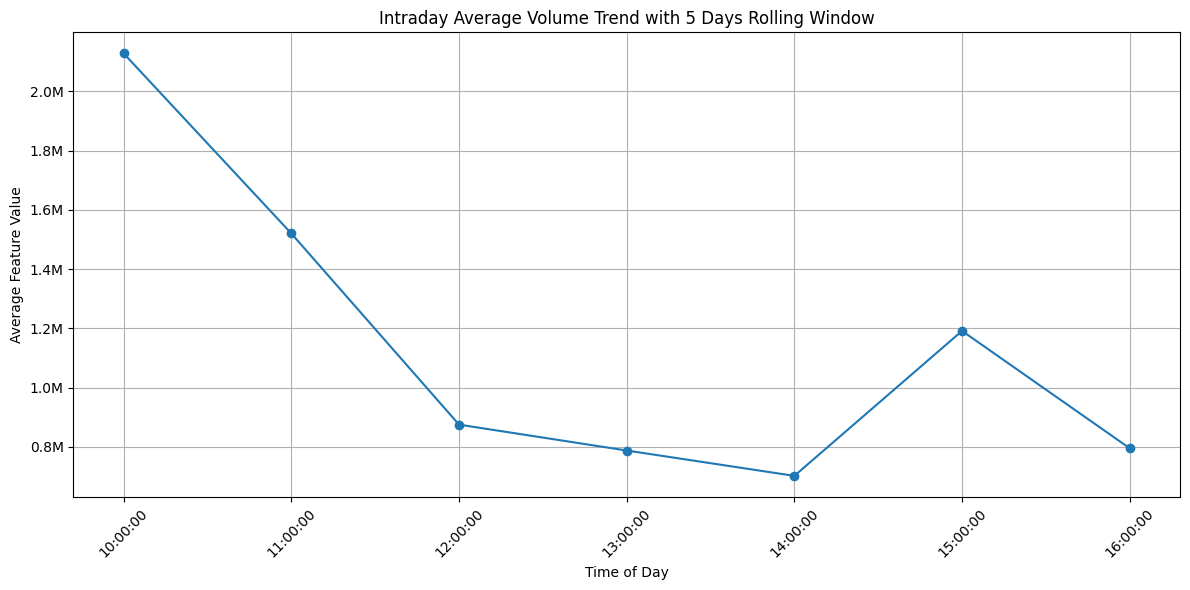

In [6]:
intraday_feature_trend_viz(intraday_volume_df)

In [7]:
intraday_rvol_df

,close,volume,CumVolume,Expected_Cumulative_Volume,Intraday_RVOL_cum
date,,,,,
2025-08-07 10:00:00,153.5001,2361682.0,2361682.0,NaN,NaN
2025-08-07 11:00:00,151.9150,1588514.0,3950196.0,NaN,NaN
2025-08-07 12:00:00,152.1100,1163869.0,5114065.0,NaN,NaN
2025-08-07 13:00:00,153.1600,576608.0,5690673.0,NaN,NaN
2025-08-07 14:00:00,152.6700,558516.0,6249189.0,NaN,NaN
...,...,...,...,...,...
2025-09-05 12:00:00,110.7400,805913.0,6337884.0,3757578.4,1.686694
2025-09-05 13:00:00,112.2950,806046.0,7143930.0,4447879.4,1.606143
2025-09-05 14:00:00,114.2000,871444.0,8015374.0,5052476.2,1.586425


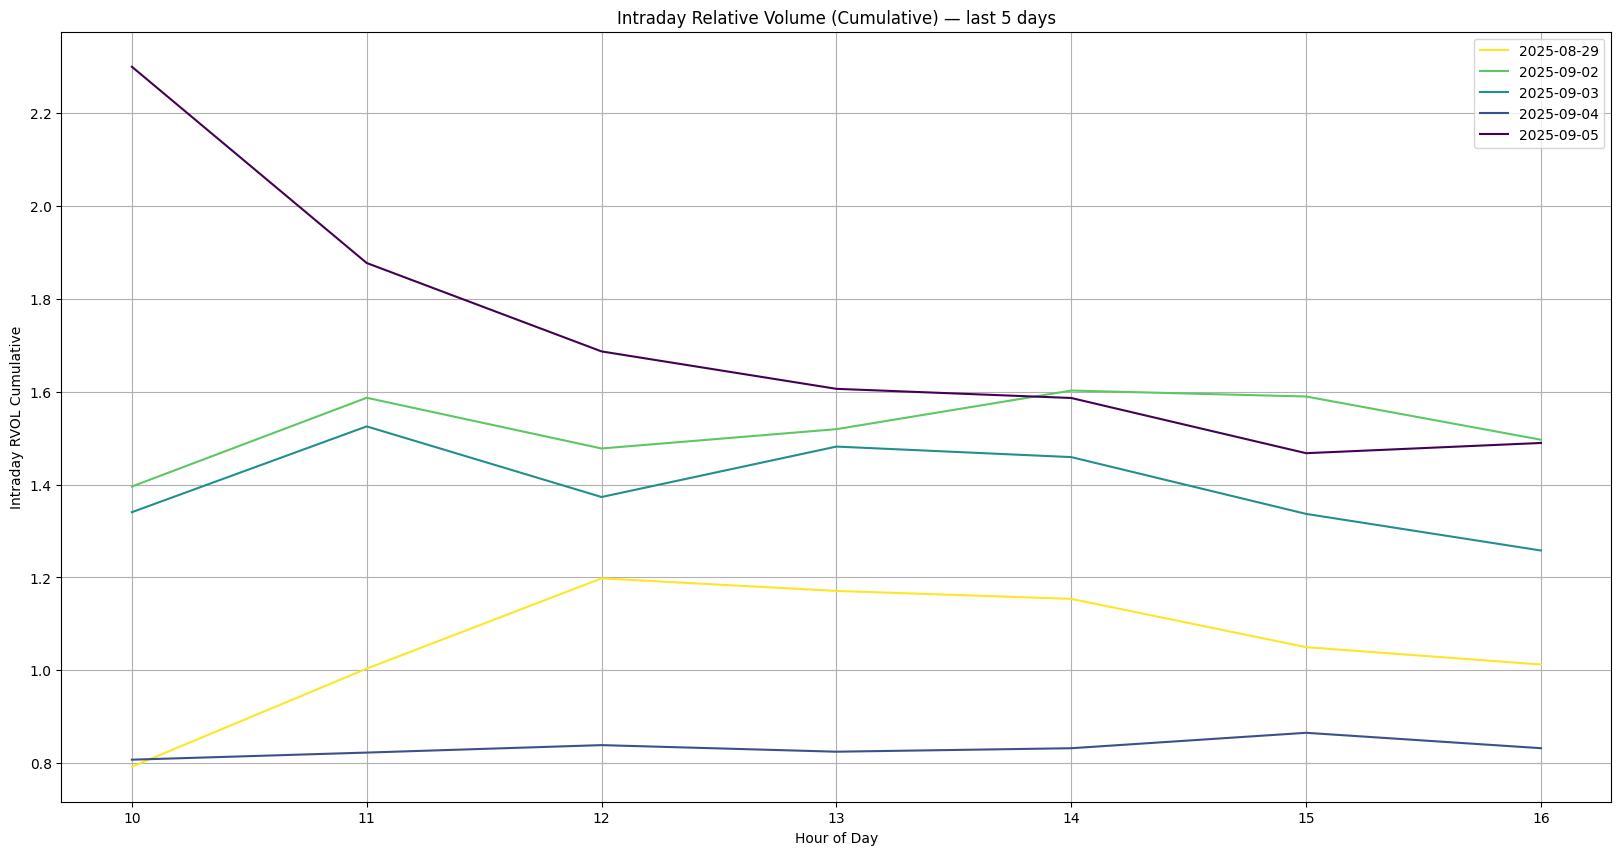

In [8]:
intraday_rvol_viz(intraday_rvol_df, 5)